In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
from scipy.stats import bernoulli, norm
from sklearn.linear_model import LogisticRegressionCV

rng = default_rng()
np.seterr(divide="ignore", invalid="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
def generate_dataset(num_samples, num_params, b_true):
    X = norm.rvs(loc=0, scale=1, size=(num_samples, num_params))
    p = 1 / (1 + np.exp(-np.dot(X, b_true)))
    y = bernoulli.rvs(p)
    return X, y


def fit_logistic_model(X, y):
    model = LogisticRegressionCV(
        penalty="l1", solver="liblinear", fit_intercept=True, max_iter=1000
    )
    model.fit(X, y)
    return model


def save_relevant_variables(model):
    b = model.coef_[0]
    return np.where(b != 0, 1, 0)


def PSR(true, selected):
    return np.mean(np.logical_and(true == 1, selected == 1)) / np.mean(true == 1)


def FDR(true, selected):
    selected_positives = np.where(selected == 1)[0]
    false_positives = np.where(true[selected_positives] == 0)[0]
    if len(selected_positives) == 0:
        return 0
    else:
        return len(false_positives) / len(selected_positives)


def run_experiments(l_times, num_samples, num_params, func=generate_dataset):
    PSR_all = np.zeros((l_times, 1))
    FDR_all = np.zeros((l_times, 1))
    b_true = np.zeros((num_params, 1))
    b_true[:10] = 1
    b_true = b_true.ravel()
    for i in range(l_times):
        X, y = func(num_samples, num_params, b_true)
        model = fit_logistic_model(X, y)
        b = save_relevant_variables(model)
        PSR_all[i] = PSR(b_true, b)
        FDR_all[i] = FDR(b_true, b)
    avg_PSR = np.mean(PSR_all)
    avg_FDR = np.mean(FDR_all)
    return avg_PSR, avg_FDR


def generate_dataset_(num_samples, num_params, b_true):
    X = norm.rvs(loc=0, scale=1, size=(num_samples, num_params))
    dot_products = X @ b_true
    p = norm.cdf(dot_products)
    y = bernoulli.rvs(p)
    return X, y


def plot_results(x, y, title, x_label, y_label):
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [3]:
b = np.array([1 if i < 10 else 0 for i in range(20)])
X, y = generate_dataset(10, 20, b)

In [4]:
model = fit_logistic_model(X, y)
b_important = save_relevant_variables(model)
b_important

c:\Users\WOlejnik\anaconda3\envs\aml\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [5]:
avg_PSR, avg_FDR = run_experiments(100, 50, 20)


print(avg_PSR)
print(avg_FDR)

c:\Users\WOlejnik\anaconda3\envs\aml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\WOlejnik\anaconda3\envs\aml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\WOlejnik\anaconda3\envs\aml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\WOlejnik\anaconda3\envs\aml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8780000000000001
0.39411545033913453


c:\Users\WOlejnik\anaconda3\envs\aml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\WOlejnik\anaconda3\envs\aml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\WOlejnik\anaconda3\envs\aml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\WOlejnik\anaconda3\envs\aml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\WOlejnik\anaconda3\envs\aml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\WOlejnik\anaconda3\envs\aml\lib\site-packages\sklearn\svm\_base.py:1244

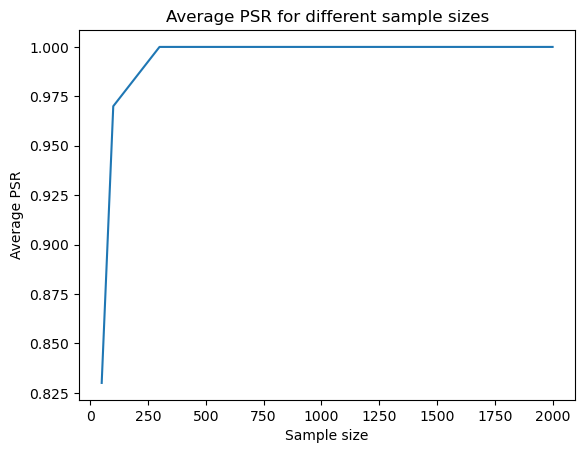

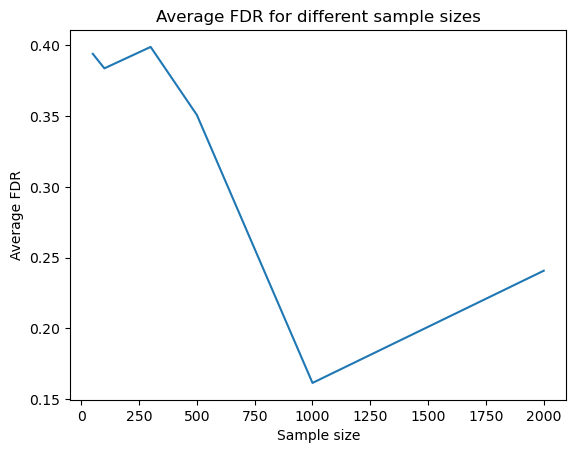

In [6]:
# Run experiments for different sample sizes
sample_sizes = [50, 100, 300, 500, 1000, 2000]
num_params = 20
l_times = 10
avg_PSRs = []
avg_FDRs = []
for sample_size in sample_sizes:
    avg_PSR, avg_FDR = run_experiments(l_times, sample_size, num_params)
    avg_PSRs.append(avg_PSR)
    avg_FDRs.append(avg_FDR)

plot_results(
    sample_sizes,
    avg_PSRs,
    "Average PSR for different sample sizes",
    "Sample size",
    "Average PSR",
)
plot_results(
    sample_sizes,
    avg_FDRs,
    "Average FDR for different sample sizes",
    "Sample size",
    "Average FDR",
)


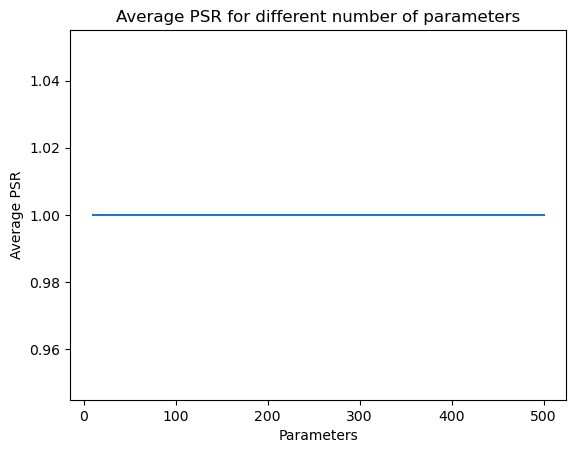

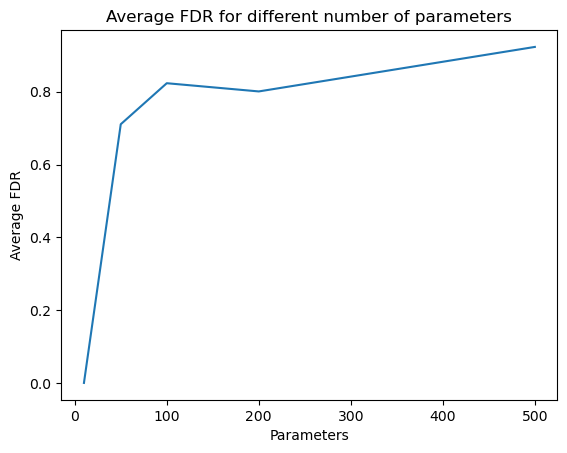

In [7]:
sample_sizes = 300
num_params = [10, 50, 100, 200, 500]
l_times = 10
avg_PSRs = []
avg_FDRs = []
for param in num_params:
    avg_PSR, avg_FDR = run_experiments(l_times, sample_sizes, param)
    avg_PSRs.append(avg_PSR)
    avg_FDRs.append(avg_FDR)

plot_results(
    num_params,
    avg_PSRs,
    "Average PSR for different number of parameters",
    "Parameters",
    "Average PSR",
)
plot_results(
    num_params,
    avg_FDRs,
    "Average FDR for different number of parameters",
    "Parameters",
    "Average FDR",
)

In [8]:

b_true = np.array([1 if i < 10 else 0 for i in range(20)])
X_new, y_new = generate_dataset_(20, 20, b_true)

avg_PSR_other, avg_FDR_other = run_experiments(100, 20, 20, func=generate_dataset_)

print(avg_PSR_other)
print(avg_FDR_other)

c:\Users\WOlejnik\anaconda3\envs\aml\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.591
0.3487715717804727


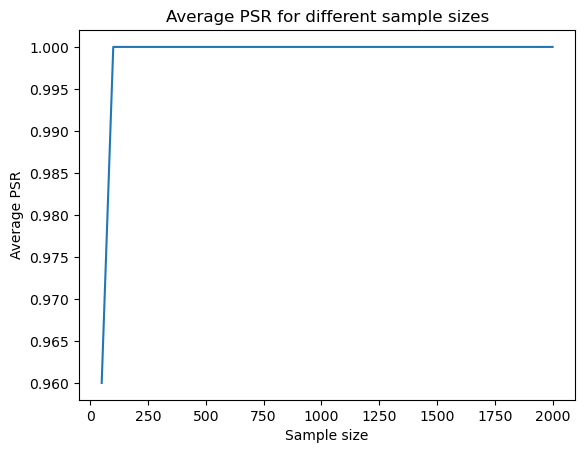

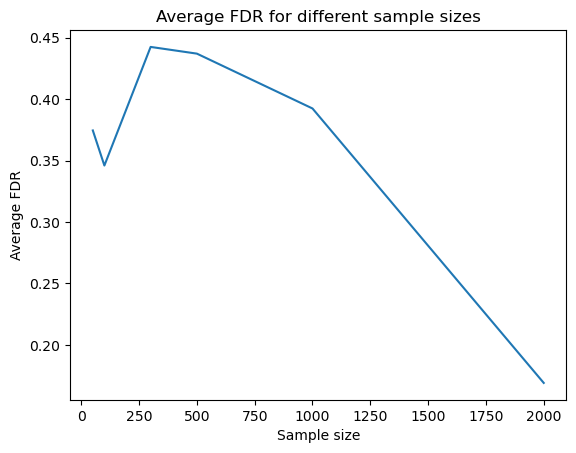

In [9]:
# Run experiments for different sample sizes
sample_sizes = [50, 100, 300, 500, 1000, 2000]
num_params = 20
l_times = 10
avg_PSRs = []
avg_FDRs = []
for sample_size in sample_sizes:
    avg_PSR, avg_FDR = run_experiments(
        l_times, sample_size, num_params, func=generate_dataset_
    )
    avg_PSRs.append(avg_PSR)
    avg_FDRs.append(avg_FDR)

plot_results(
    sample_sizes,
    avg_PSRs,
    "Average PSR for different sample sizes",
    "Sample size",
    "Average PSR",
)
plot_results(
    sample_sizes,
    avg_FDRs,
    "Average FDR for different sample sizes",
    "Sample size",
    "Average FDR",
)


c:\Users\WOlejnik\anaconda3\envs\aml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\WOlejnik\anaconda3\envs\aml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\WOlejnik\anaconda3\envs\aml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\WOlejnik\anaconda3\envs\aml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\WOlejnik\anaconda3\envs\aml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\WOlejnik\anaconda3\envs\aml\lib\site-packages\sklearn\svm\_base.py:1244

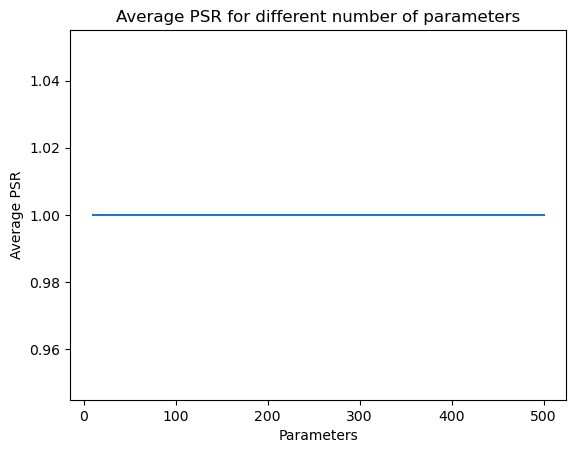

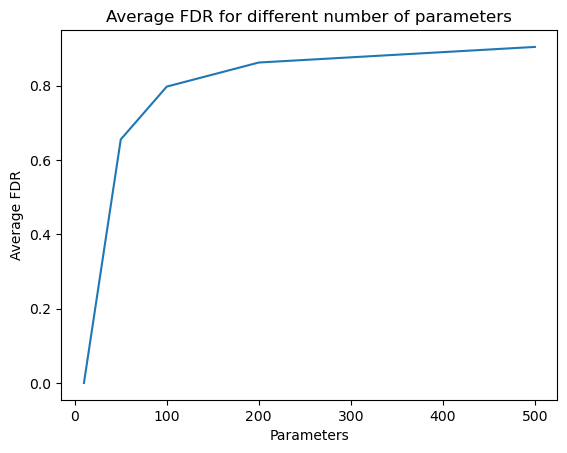

In [10]:
sample_sizes = 300
num_params = [10, 50, 100, 200, 500]
l_times = 10
avg_PSRs = []
avg_FDRs = []
for param in num_params:
    avg_PSR, avg_FDR = run_experiments(
        l_times, sample_sizes, param, func=generate_dataset_
    )
    avg_PSRs.append(avg_PSR)
    avg_FDRs.append(avg_FDR)

plot_results(
    num_params,
    avg_PSRs,
    "Average PSR for different number of parameters",
    "Parameters",
    "Average PSR",
)
plot_results(
    num_params,
    avg_FDRs,
    "Average FDR for different number of parameters",
    "Parameters",
    "Average FDR",
)